In [ ]:
# Required librariess for this project
!pip install easyocr
!pip install pillow
!pip install cv2

In [1]:
# Importing libraries 
import easyocr
from collections import namedtuple
import pandas as pd
from PIL import Image
import PIL
from PIL import ImageDraw
import re
import cv2

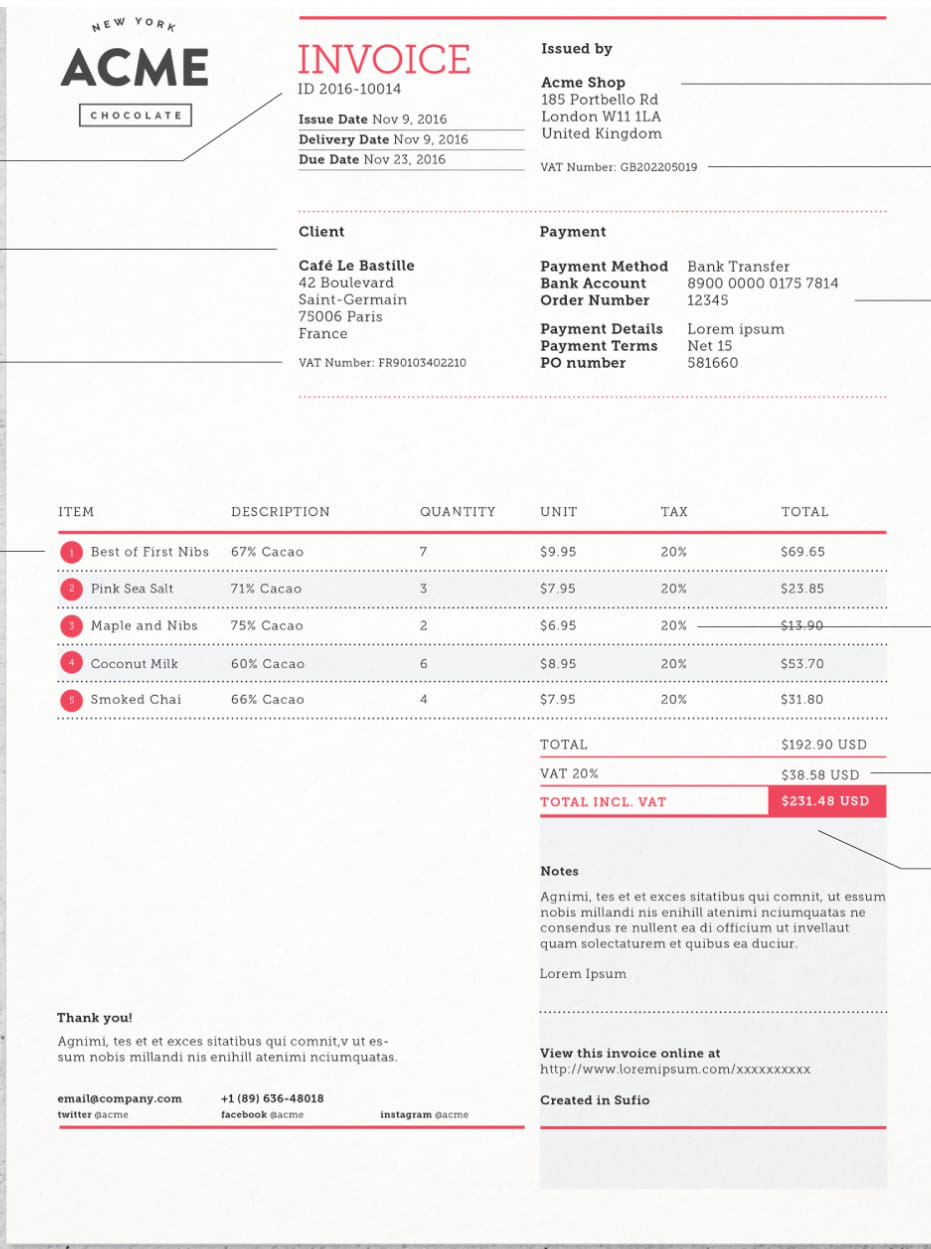

In [25]:
# Reading Image
im = PIL.Image.open("image.jpg")
im

In [3]:
# Extracting Text from pdf using easyocr
reader = easyocr.Reader(['en'],gpu=True)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [26]:
bounds = reader.readtext("image.jpg")
bounds

[([[539, 41], [615, 41], [615, 59], [539, 59]],
  'Issued by',
  0.6829125926555986),
 ([[60, 42], [216, 42], [216, 94], [60, 94]], 'ACME', 0.9996414184570312),
 ([[290, 36], [474, 36], [474, 80], [290, 80]], 'INVOICE', 0.9995461989495854),
 ([[541, 73], [629, 73], [629, 93], [541, 93]],
  'Acme Shop',
  0.9478932198201058),
 ([[293, 79], [403, 79], [403, 99], [293, 99]],
  'ID 2016-10014',
  0.977539022031725),
 ([[539, 89], [661, 89], [661, 109], [539, 109]],
  '185 Portbello Rd',
  0.9007013673127803),
 ([[89, 109], [185, 109], [185, 123], [89, 123]],
  'C h 0 € 0 LATE',
  0.10980672864261919),
 ([[297, 111], [451, 111], [451, 127], [297, 127]],
  'Issue Date Nov 9 2016',
  0.7565363167007116),
 ([[539, 107], [663, 107], [663, 125], [539, 125]],
  'London WIl ILA',
  0.8313704523670483),
 ([[296, 131], [423, 131], [423, 149], [296, 149]],
  'Delivery Date Nov',
  0.807949244088944),
 ([[437, 133], [471, 133], [471, 147], [437, 147]],
  '2016',
  0.7599679607173051),
 ([[541, 125], [

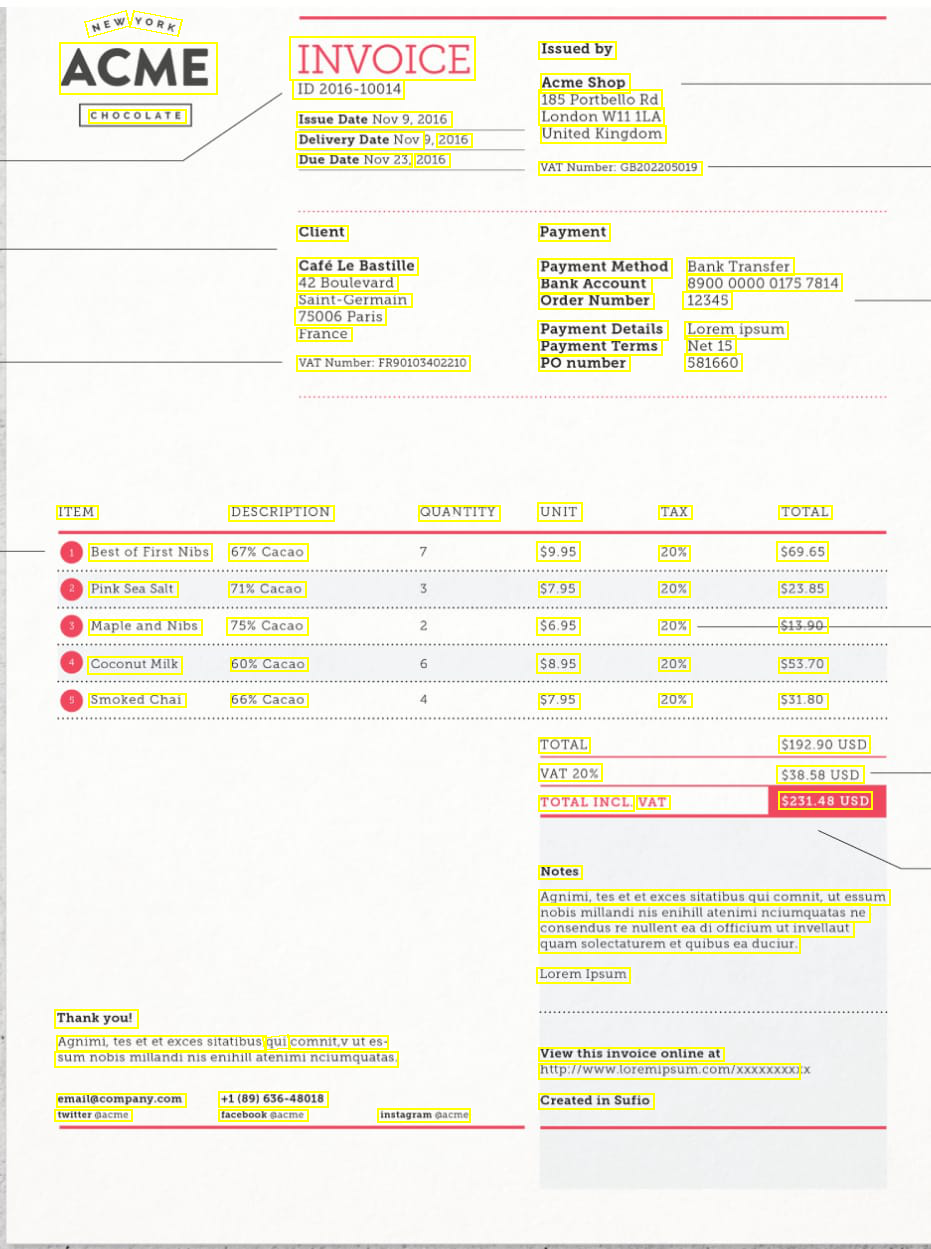

In [27]:
# Drawing Boundries to the selected text by easyocr
def draw_boxes(image, bounds, color='yellow',width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2,p3 = bound[0]
        draw.line([*p0,*p1,*p2,*p3,*p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [12]:
# length of bounds
len(bounds)

96

In [34]:
# Printing the list of easyocr extracted information
list1 = []
for text in bounds:
    txt = text[1].replace(",",".")
    list1.append(txt)
list1

['Issued by',
 'ACME',
 'INVOICE',
 'Acme Shop',
 'ID 2016-10014',
 '185 Portbello Rd',
 'C h 0 € 0 LATE',
 'Issue Date Nov 9 2016',
 'London WIl ILA',
 'Delivery Date Nov',
 '2016',
 'United Kingdom',
 'Due Date Nov 23',
 '2016',
 'VAT Numbec GB202205019',
 'Client',
 'Payment',
 'Cafe Le Bastille',
 'Payment Method',
 'Bank Transfer',
 '42 Boulevard',
 'Bank Account',
 '8900 000o 0175 7814',
 'Saini-Germain',
 'Order Number',
 '12345',
 '75006 Paris',
 'France',
 'Payment Details',
 'Lorem ipsum',
 'Payment Terms',
 'Net 15',
 'VAT Number: FR90103402210',
 'PO number',
 '581660',
 'ITEM',
 'DESCRIPTION',
 'QUANTITY',
 'UNIT',
 'TAX',
 'TOTAL',
 'Best of First Nibs',
 '67% Cacao',
 '59.95',
 '207',
 '569.65',
 'Pink Sea Salt',
 '71% Cacao',
 'S7 95',
 '20%',
 '523 85',
 'Maple and Nibs',
 '75% Cacao',
 '56.95',
 '20%',
 '5+390',
 'Coconut Milk',
 '60% Cacao',
 '58.95',
 '20%',
 '553.70',
 'Smoked Chal',
 '66% Cacao',
 '57.95',
 '207',
 '531.80',
 'TOTAL',
 '5192.90 USD',
 'VAT 207',
 

In [35]:
# Replacing wrong readed figures 
for i in range(len(list1)):
    if list1[i].startswith('5'):
        list1[i] = '$' + list1[i][1:]
print(list1)

['Issued by', 'ACME', 'INVOICE', 'Acme Shop', 'ID 2016-10014', '185 Portbello Rd', 'C h 0 € 0 LATE', 'Issue Date Nov 9 2016', 'London WIl ILA', 'Delivery Date Nov', '2016', 'United Kingdom', 'Due Date Nov 23', '2016', 'VAT Numbec GB202205019', 'Client', 'Payment', 'Cafe Le Bastille', 'Payment Method', 'Bank Transfer', '42 Boulevard', 'Bank Account', '8900 000o 0175 7814', 'Saini-Germain', 'Order Number', '12345', '75006 Paris', 'France', 'Payment Details', 'Lorem ipsum', 'Payment Terms', 'Net 15', 'VAT Number: FR90103402210', 'PO number', '$81660', 'ITEM', 'DESCRIPTION', 'QUANTITY', 'UNIT', 'TAX', 'TOTAL', 'Best of First Nibs', '67% Cacao', '$9.95', '207', '$69.65', 'Pink Sea Salt', '71% Cacao', 'S7 95', '20%', '$23 85', 'Maple and Nibs', '75% Cacao', '$6.95', '20%', '$+390', 'Coconut Milk', '60% Cacao', '$8.95', '20%', '$53.70', 'Smoked Chal', '66% Cacao', '$7.95', '207', '$31.80', 'TOTAL', '$192.90 USD', 'VAT 207', '$38.58 USD', 'TOTAL INCL;', 'VAT', '$231.48 USD', 'Notes', 'Agnimi t

In [ ]:
ind = list1.index("S7 95")
list1[ind] = list1[ind].replace("S","$").replace(" ",".")

In [ ]:
ind1 = list1.index("207")
list1[ind1] = list1[ind1].replace("207","20%")

In [39]:
# Printing final extracted text after replacing
final = "\n".join(list1)
print(final)

Issued by
ACME
INVOICE
Acme Shop
ID 2016-10014
185 Portbello Rd
C h 0 € 0 LATE
Issue Date Nov 9 2016
London WIl ILA
Delivery Date Nov
2016
United Kingdom
Due Date Nov 23
2016
VAT Numbec GB202205019
Client
Payment
Cafe Le Bastille
Payment Method
Bank Transfer
42 Boulevard
Bank Account
8900 000o 0175 7814
Saini-Germain
Order Number
12345
75006 Paris
France
Payment Details
Lorem ipsum
Payment Terms
Net 15
VAT Number: FR90103402210
PO number
$81660
ITEM
DESCRIPTION
QUANTITY
UNIT
TAX
TOTAL
Best of First Nibs
67% Cacao
$9.95
20%
$69.65
Pink Sea Salt
71% Cacao
$7.95
20%
$23 85
Maple and Nibs
75% Cacao
$6.95
20%
$+390
Coconut Milk
60% Cacao
$8.95
20%
$53.70
Smoked Chal
66% Cacao
$7.95
20%
$31.80
TOTAL
$192.90 USD
VAT 207
$38.58 USD
TOTAL INCL;
VAT
$231.48 USD
Notes
Agnimi tes et ef exces s/talibus qui comnil ut essum
nobis millandi nS enihill atenimi nciumquatas ne
consendus re nullent ea di ollicium ut invellaut
quam solectaturem e quibus ea duciur
Lorem Ipsum
Thank youl
Agnimi tes et et exce

In [33]:
# Creating Named tuple for storing data.
Inv = namedtuple("Inv","Item Description Unit Tax Total Total_VAT")

In [40]:
# From information extracting necessary fields and making DataFrame
invoice = []
def ocr_fun(value):
    item = re.findall(r"(?<=\n)[A-z].+(?=\n\d{2}[%])",value)
    description = re.findall(r"(?<=\n)\d{2}[%]\s\w{5}(?=\n)",value)
    unit = re.findall(r"(?<=\n)[$]\d{1}[.]\d{2}(?=\n)",value)
    tax = re.findall(r"(?<=\n)\d{2}[%](?=\n)",value)
    total = re.findall(r"(?<=\d{2}[%]\n)[$]\d{0,2}[. +]\d{2,3}(?=\n)",value)
    vat = re.findall(r"(?<=\n[A-Z]{3}\n)[$]\d{3}[.]\d{2}(?=\s)",value)[0]
    Inv = namedtuple("Inv","Item Description Unit Tax Total Total_VAT")
    for i in range(0,len(item)):
        invoice.append(Inv(item[i],description[i],unit[i],tax[i],total[i],vat))
    df = pd.DataFrame(invoice)
    return df

In [41]:
# Printing final dataframe for checking
ocr_fun(final)

,Item,Description,Unit,Tax,Total,Total_VAT
0,Best of First Nibs,67% Cacao,$9.95,20%,$69.65,$231.48
1,Pink Sea Salt,71% Cacao,$7.95,20%,$23 85,$231.48
2,Maple and Nibs,75% Cacao,$6.95,20%,$+390,$231.48
3,Coconut Milk,60% Cacao,$8.95,20%,$53.70,$231.48
4,Smoked Chal,66% Cacao,$7.95,20%,$31.80,$231.48


In [52]:
# Storing results of OCR in CSV format.
df.to_csv("inv_final.csv")